# Raster Data in Python

In [2]:
import os

import earthpy as et
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

In [3]:
et.data.get_data('colorado-flood')

'/Users/elsa/earth-analytics/data/colorado-flood/.'

In [5]:
os.chdir(os.path.join(
    et.io.HOME, 'earth-analytics', 'data', 'colorado-flood'))

In [6]:
%%bash
find .

.
./precipitation
./precipitation/PRECIP_HLY_documentation.pdf
./precipitation/805333-precip-daily-1948-2013.csv
./precipitation/805325-precip-dailysum-2003-2013.csv
./precipitation/805325-precip-daily-2003-2013.csv
./precipitation/precip-boulder-aug-oct-2013.csv
./discharge
./discharge/README_dischargeMetadata.rtf
./discharge/06730200-discharge-daily-1986-2013.csv
./discharge/06730200-discharge-daily-1986-2013.txt
./spatial
./spatial/boulder-leehill-rd
./spatial/boulder-leehill-rd/clip-extent.qpj
./spatial/boulder-leehill-rd/clip-extent.prj
./spatial/boulder-leehill-rd/README.md
./spatial/boulder-leehill-rd/clip-extent.dbf
./spatial/boulder-leehill-rd/post-flood
./spatial/boulder-leehill-rd/post-flood/lidar
./spatial/boulder-leehill-rd/post-flood/lidar/post_DTM_hill.tif
./spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif
./spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif
./spatial/boulder-leehill-rd/post-flood/lidar/post_DSM_hill.tif
./spatial/boulder-leehill-rd/pre-flo

In [10]:
leehill_dir = os.path.join('spatial', 'boulder-leehill-rd')

pre_post_str = ['pre', 'post']
dtm_dsm_str = ['DTM', 'DSM']

lidar_pths = {}
for timing_str in pre_post_str:
    for type_str in dtm_dsm_str:
        pth = (os.path.join(leehill_dir, '{}-flood', 'lidar', '{}_{}.tif')
         .format(timing_str, timing_str, type_str))
        lidar_pths['{}_{}'.format(timing_str, type_str)] = pth
lidar_pths

{'pre_DTM': 'spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif',
 'pre_DSM': 'spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif',
 'post_DTM': 'spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif',
 'post_DSM': 'spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif'}

In [26]:
pre_dtm = rxr.open_rasterio(lidar_pths['pre_DTM']).squeeze()

ValueError: Ellipsis must be a single dataset dimension

In [19]:
pre_dtm.rio.crs

CRS.from_epsg(32613)

In [21]:
lidar_das = {}
for tif_key in lidar_pths.keys():
    lidar_das[tif_key] = rxr.open_rasterio(lidar_pths[tif_key], ).squeeze()

lidar_das

{'pre_DTM': <xarray.DataArray (y: 2000, x: 4000)>
 [8000000 values with dtype=float32]
 Coordinates:
     band         int64 1
   * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
   * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
     spatial_ref  int64 0
 Attributes:
     _FillValue:    -3.4028234663852886e+38
     scale_factor:  1.0
     add_offset:    0.0,
 'pre_DSM': <xarray.DataArray (y: 2000, x: 4000)>
 [8000000 values with dtype=float32]
 Coordinates:
     band         int64 1
   * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
   * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
     spatial_ref  int64 0
 Attributes:
     _FillValue:    -3.4028230607370965e+38
     scale_factor:  1.0
     add_offset:    0.0,
 'post_DTM': <xarray.DataArray (y: 2000, x: 4000)>
 [8000000 values with dtype=float32]
 Coordinates:
     band         int64 1
   * x            (x) float64 4.72e+05 4.72e+05 

# Canopy Height Model

CHM = DSM - DTM

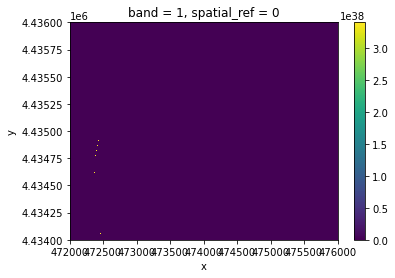

In [23]:
pre_chm = lidar_das['pre_DSM'] - lidar_das['pre_DTM']
pre_chm.plot()